In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import graphviz
from sklearn.tree import export_graphviz

%matplotlib inline

# 유방암 데이터 로드

In [3]:
cancer = load_breast_cancer()

In [6]:
X = cancer.data
y = cancer.target

In [8]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [25]:
# cancer data의 target의 비율을 봐보자
# malignant : 악성
# benign : 양성

np.bincount(cancer.target)

array([212, 357], dtype=int64)

# 데이터 정리

In [30]:
print('1. cancer.keys() : {}'.format(cancer.keys()))
print()
print('2. Shape of Cancer Data : {}'.format(cancer.data.shape))
print()
print('3. Sample Count per Class : {}'.format(
                    {n:v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}
))
print()
print('4. Feature Names : \n{}'.format(cancer.feature_names))

1. cancer.keys() : dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

2. Shape of Cancer Data : (569, 30)

3. Sample Count per Class : {'malignant': 212, 'benign': 357}

4. Feature Names : 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [12]:
df_cancer = pd.DataFrame(X, columns=cancer.feature_names)
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 모델 생성 - Decision Tree

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df_cancer, y, test_size=0.2, random_state=42)

In [42]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [43]:
pred = tree.predict(X_test)
score = accuracy_score(y_test, pred, normalize=False)
score

107

# 특성 중요도

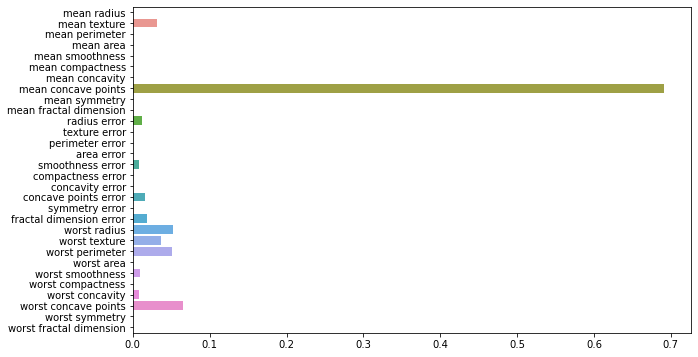

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(x= tree.feature_importances_, y=cancer.feature_names)
plt.show()

# graphviz 시각화

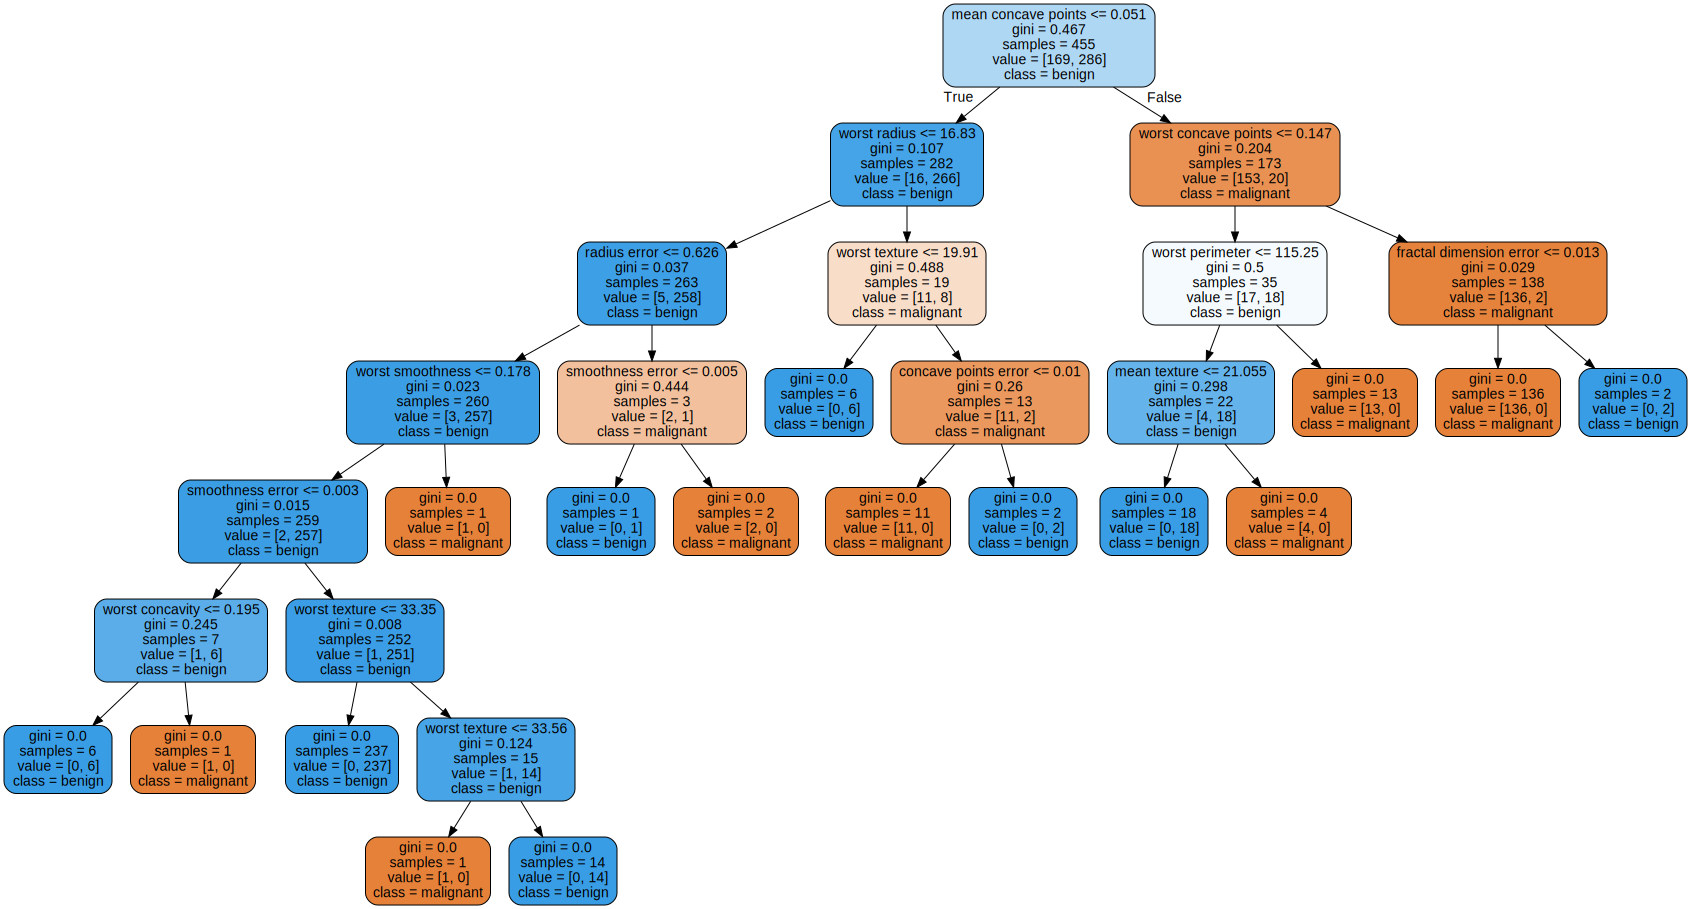

In [49]:
export_graphviz(
        tree,
        out_file="cancer_tree.dot",
        feature_names=cancer.feature_names,
        class_names=cancer.target_names,
        rounded=True,
        filled=True
    )

with open("cancer_tree.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='cancer_tree', directory='images/decision_trees', cleanup=True)
dot
# display(dot)